In [ ]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
from scipy.stats import randint, uniform

In [ ]:
data_path = '../data/combined_keypoints.csv'
print(f"Loading data from {data_path}")
df = pd.read_csv(data_path)

print("First few rows of the dataset:")
print(df.head())

X = df.drop(columns=['Class'])
y = df['Class']

le = LabelEncoder()
y = le.fit_transform(y)
print("Class labels encoded.")

Loading data from ../data/combined_keypoints.csv
First few rows of the dataset:
        Class    Nose_x    Nose_y  Nose_conf  LeftEye_x  LeftEye_y  \
0  Warrior_II  0.275027  0.441496   0.838373   0.257330   0.454769   
1  Warrior_II  0.361404  0.488448   0.632348   0.354708   0.496576   
2  Warrior_II  0.226947  0.543324   0.787434   0.213398   0.533082   
3  Warrior_II  0.392478  0.374899   0.328839   0.381358   0.370187   
4  Warrior_II  0.223151  0.476531   0.887696   0.211527   0.493164   

   LeftEye_conf  RightEye_x  RightEye_y  RightEye_conf  ...  LeftKnee_conf  \
0      0.874609    0.258129    0.449623       0.896995  ...       0.941765   
1      0.715429    0.351345    0.491862       0.855811  ...       0.829439   
2      0.857410    0.214061    0.525327       0.864843  ...       0.923154   
3      0.546548    0.383478    0.369107       0.577419  ...       0.324949   
4      0.910345    0.209859    0.482766       0.860895  ...       0.828863   

   RightKnee_x  RightKnee_y  R

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data split into training and testing sets. Training size: {X_train.shape[0]}, Testing size: {X_test.shape[0]}")

Data split into training and testing sets. Training size: 10981, Testing size: 2746


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Features standardized.")

pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print("PCA applied for dimensionality reduction.")

knn_param_dist = {
    'n_neighbors': randint(3, 8),
    'leaf_size': randint(20, 40),
    'p': uniform(1.0, 1.5),
    'metric': ['manhattan', 'euclidean', 'chebyshev']
}

knn_random_search = RandomizedSearchCV(
    KNeighborsClassifier(algorithm='brute', weights='distance'),
    param_distributions=knn_param_dist,
    n_iter=50,
    cv=10,
    n_jobs=-1,
    random_state=42
)
print("Starting hyperparameter tuning with Randomized Search for k-NN.")
knn_random_search.fit(X_train, y_train)


best_knn_params = knn_random_search.best_params_
best_knn_score = knn_random_search.best_score_
print(f"Best k-NN parameters found: {best_knn_params}")
print(f"Best k-NN cross-validation score: {best_knn_score:.4f}")

Features standardized.
PCA applied for dimensionality reduction.
Starting hyperparameter tuning with Randomized Search for k-NN.
Best k-NN parameters found: {'leaf_size': 26, 'metric': 'manhattan', 'n_neighbors': 5, 'p': 2.169536500409154}
Best k-NN cross-validation score: 0.6744


In [ ]:
best_knn = knn_random_search.best_estimator_
best_knn.fit(X_train, y_train)
print("Training completed with the best k-NN hyperparameters.")
print(f"Best k-NN model: {best_knn}")

Training completed with the best k-NN hyperparameters.
Best k-NN model: KNeighborsClassifier(algorithm='brute', leaf_size=26, metric='manhattan',
                     p=2.169536500409154, weights='distance')


In [ ]:
y_pred_knn = best_knn.predict(X_test)
print("k-NN predictions made on the test set.")

k-NN predictions made on the test set.


In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print(f"k-NN Accuracy: {accuracy_knn:.4f}")
print(f"k-NN Precision: {precision_knn:.4f}")
print(f"k-NN Recall: {recall_knn:.4f}")
print(f"k-NN F1 Score: {f1_knn:.4f}")

k-NN Accuracy: 0.6675
k-NN Precision: 0.6823
k-NN Recall: 0.6675
k-NN F1 Score: 0.6647


In [ ]:
print("k-NN Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))

k-NN Classification Report:
                                precision    recall  f1-score   support

       Bharadvaja's_Twist_pose       0.93      0.57      0.70        23
                          Boat       0.83      0.74      0.79        47
                   Bound_Angle       0.71      0.68      0.69        37
           Bow_or_Dhanurasana_       0.87      0.87      0.87        30
                        Bridge       0.84      0.78      0.81        27
                         Camel       0.84      0.89      0.86        36
                       Cat_Cow       0.88      0.91      0.90        47
                         Chair       0.68      0.68      0.68        37
                         Child       0.70      0.89      0.78        35
                         Cobra       0.79      0.86      0.82        94
                      Cockerel       0.48      0.55      0.51        20
                        Corpse       0.43      0.61      0.51        31
                      Cow_Face     

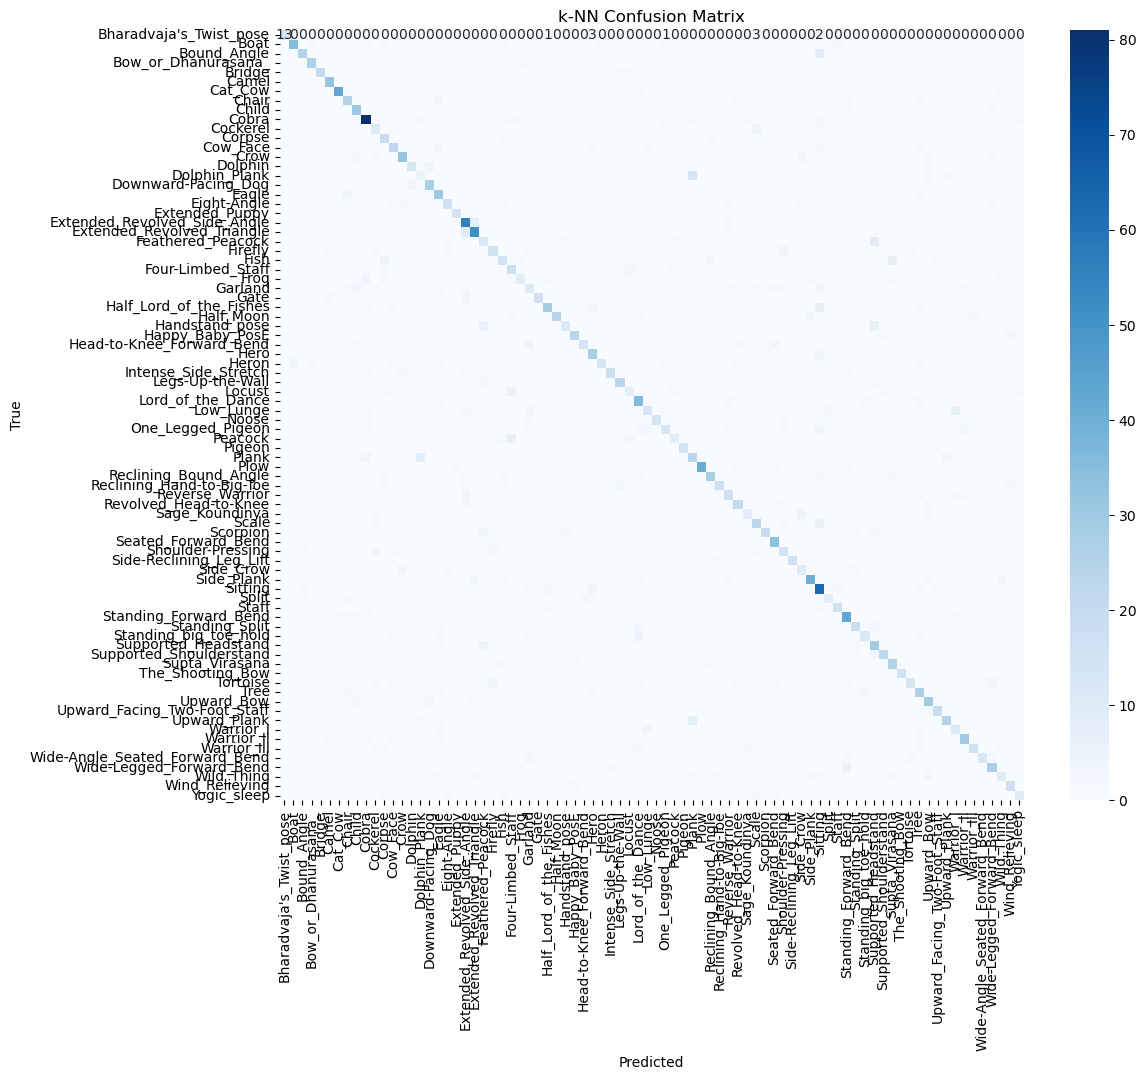

k-NN Confusion matrix displayed.


In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('k-NN Confusion Matrix')
plt.show()
print("k-NN Confusion matrix displayed.")

In [ ]:
print("Training Random Forest Classifier.")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

Training Random Forest Classifier.


In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1 Score: {f1_rf:.4f}")

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

Random Forest Accuracy: 0.6631
Random Forest Precision: 0.6760
Random Forest Recall: 0.6631
Random Forest F1 Score: 0.6563
Random Forest Classification Report:
                                precision    recall  f1-score   support

       Bharadvaja's_Twist_pose       0.52      0.52      0.52        23
                          Boat       0.71      0.85      0.78        47
                   Bound_Angle       0.71      0.59      0.65        37
           Bow_or_Dhanurasana_       0.66      0.70      0.68        30
                        Bridge       0.74      0.74      0.74        27
                         Camel       0.70      0.86      0.78        36
                       Cat_Cow       0.88      0.89      0.88        47
                         Chair       0.72      0.70      0.71        37
                         Child       0.63      0.83      0.72        35
                         Cobra       0.68      0.86      0.76        94
                      Cockerel       0.73      

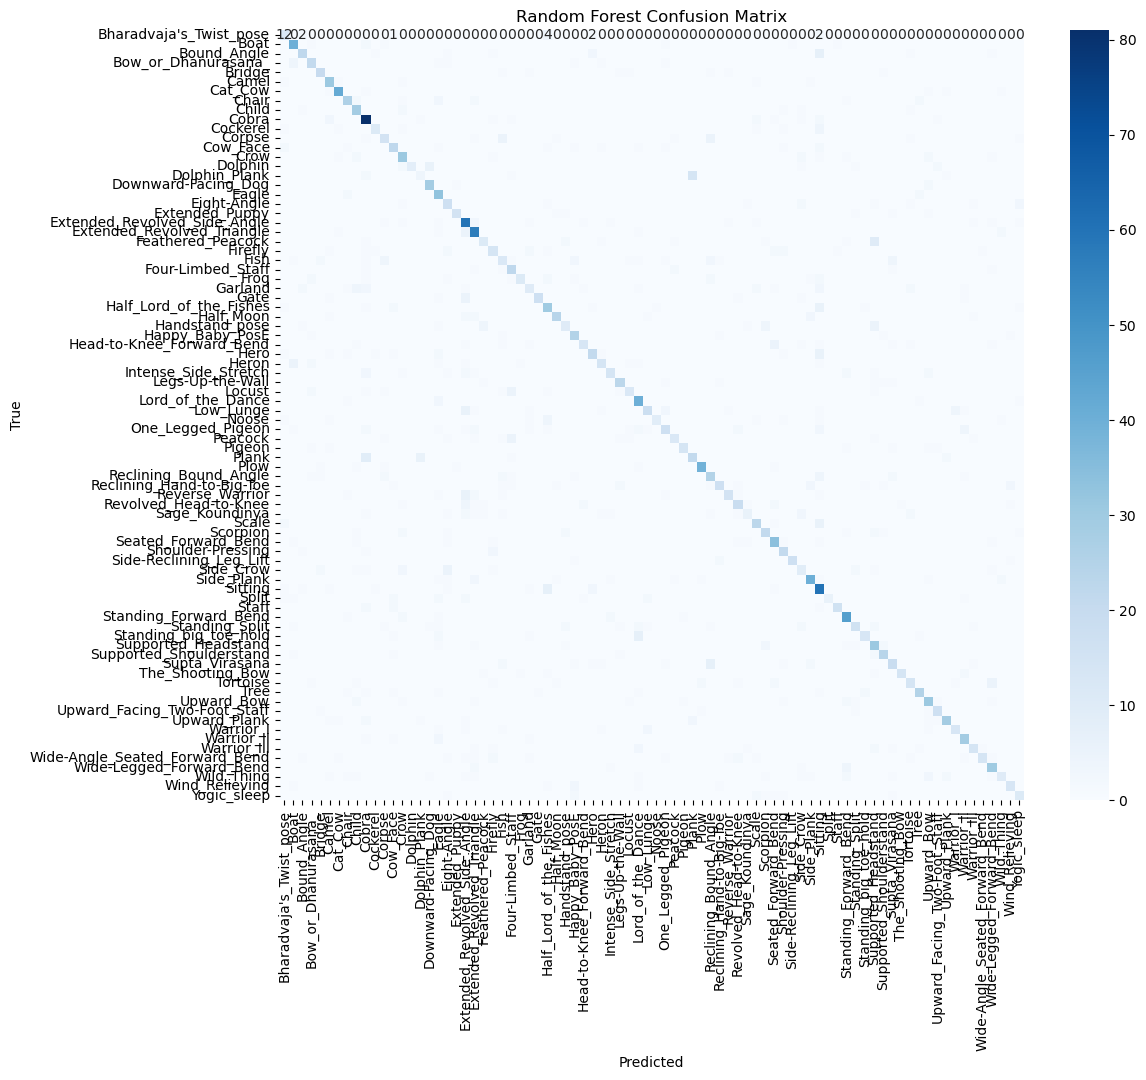

Random Forest Confusion matrix displayed.


In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()
print("Random Forest Confusion matrix displayed.")

In [ ]:
knn_model_path = 'best_knn_model_refined.pkl'
rf_model_path = 'random_forest_model.pkl'
joblib.dump(best_knn, knn_model_path)
joblib.dump(rf_model, rf_model_path)
print(f"Trained k-NN model saved to {knn_model_path}")
print(f"Trained Random Forest model saved to {rf_model_path}")

Trained k-NN model saved to best_knn_model_refined.pkl
Trained Random Forest model saved to random_forest_model.pkl
